# DATA GENERATION

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.26.3', '2.2.2', '0.20.3', '1.8.3']


## Test data
We create test data consisting of 5 variables.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization
import warnings  # For ignoring warnings

from sklearn.preprocessing import StandardScaler  # For preprocessing (standardization)
from scipy import stats  # For normality tests (Shapiro-Wilk test)

warnings.simplefilter('ignore')  # Ignore warnings
plt.rcParams["font.family"] = "MS Gothic"  # For using Japanese fonts in matplotlib

# VAR-LiNGAM artificial data generation function
def VARLiNGAM_generate(B0: np.ndarray, B1: np.ndarray, noise: np.ndarray):
    n_samples, n_features = noise.shape
    
    # Initialize output array
    out = np.zeros((n_samples, n_features))
    
    # Apply B0 to the initial noise terms
    out[0] = np.linalg.inv(np.eye(n_features) - B0) @ noise[0]
    
    # Generate data for subsequent time steps
    for t in range(1, n_samples):
        out[t] = np.dot(B1, out[t-1]) + noise[t]
        out[t] = np.linalg.inv(np.eye(n_features) - B0) @ out[t]
    
    return out

# Parameters
n_samples = 10000  # 1 million data points
n_features = 1000  # 10,000 variables

# Initialize B0 and B1 for large dimensions
np.random.seed(0)
B0 = np.zeros((n_features, n_features))
B1 = np.zeros((n_features, n_features))

# Randomly generate some non-zero entries for B0 and B1 to simulate real conditions
num_connections = n_features // 250  # Adjust the sparsity
for i in range(n_features):
    B0[i, np.random.choice(n_features, num_connections, replace=False)] = np.random.uniform(-0.5, 0.5, num_connections)
    B1[i, np.random.choice(n_features, num_connections, replace=False)] = np.random.uniform(-0.5, 0.5, num_connections)



Elapsed time: 767.385002374649 seconds


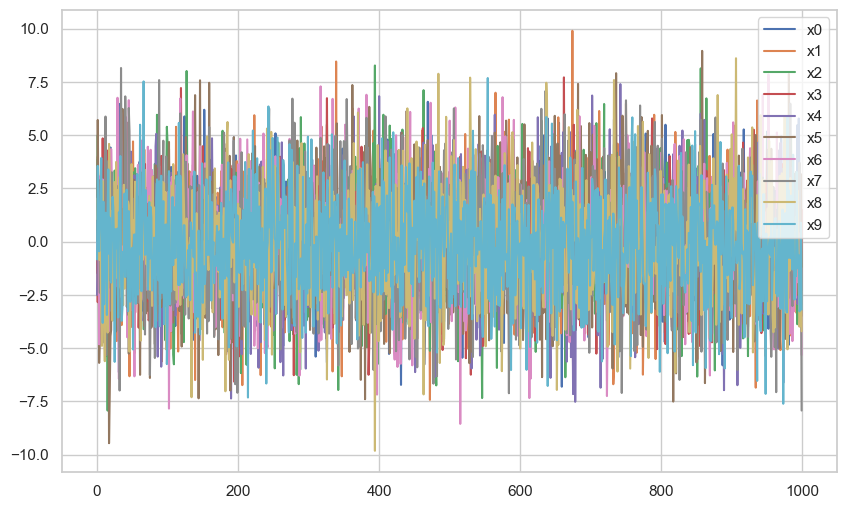

In [127]:
import time
# Generate noise
noise = np.random.laplace(size=(n_samples, n_features)).astype(np.float32)  # Using Laplace distribution for non-Gaussianity
start_time = time.time()
# Generate the data using VARLiNGAM_generate function
# Note: This will consume a lot of memory and might take considerable time
X_varlingam = VARLiNGAM_generate(B0=B0, B1=B1, noise=noise)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
# Create a DataFrame with the generated data (optional, might be too large to handle efficiently)
# df = pd.DataFrame(data=X_varlingam, columns=[f'x{i}' for i in range(n_features)])

# Display the first 5 rows of the DataFrame (optional, might be too large to handle efficiently)
# print(df.head(5))

# Save the generated data to a file (optional)
# df.to_csv('varlingam_data.csv', index=False)

# If you want to visualize a small part of the data
sampled_df = pd.DataFrame(data=X_varlingam[:1000], columns=[f'x{i}' for i in range(n_features)])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for i in range(min(n_features, 10)):  # Visualize only the first 10 variables to keep the plot readable
    plt.plot(sampled_df[f'x{i}'], label=f'x{i}')
plt.legend()
plt.show()


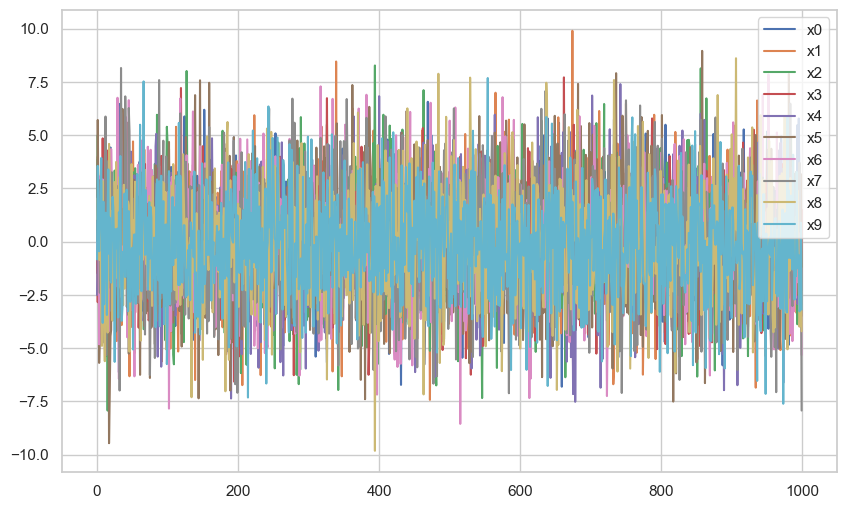

In [135]:
# If you want to visualize a small part of the data
sampled_df = pd.DataFrame(data=X_varlingam[:1000], columns=[f'x{i}' for i in range(n_features)])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for i in range(min(n_features, 10)):  # Visualize only the first 10 variables to keep the plot readable
    plt.plot(sampled_df[f'x{i}'], label=f'x{i}')
plt.legend()
# Save the plot as a PDF file
plt.savefig('plot.pdf')
plt.show()


In [133]:
# Create a DataFrame with the generated data (optional, might be too large to handle efficiently)
df = pd.DataFrame(data=X_varlingam, columns=[f'x{i}' for i in range(n_features)])

# Display the first 5 rows of the DataFrame (optional, might be too large to handle efficiently)
print(df.head(150))

# Save the generated data to a file (optional)
df.to_csv('varlingam_data.csv', index=False)


           x0        x1        x2        x3        x4        x5        x6  \
0    0.413496 -1.470413  1.089883 -0.202889 -2.499875  0.511930  0.047984   
1    3.869593  3.988099  5.001196 -2.840795 -0.596747  5.710182 -0.734998   
2    1.062727  1.568444  1.069313 -0.378062 -1.517697  1.620344  3.006897   
3    0.732082  0.122337  2.853956  1.517870  2.555023 -5.689006 -4.814583   
4    2.251220  2.099086 -1.285146  0.551566  1.350191 -4.337047 -1.971279   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.193541 -1.155273 -4.062405 -0.911767 -4.649423 -1.592481  1.045618   
146 -2.135321 -0.224979 -1.252316 -0.704937 -0.352395  7.570795  4.475507   
147  0.714175  1.590080  0.606565 -0.296042 -1.318228  0.631304  0.372706   
148 -0.727087 -2.766523 -1.563945  0.068127 -0.753312  1.228668 -1.147877   
149 -2.205543 -4.080558 -0.366879 -2.649496  2.079395  2.284038  0.148272   

           x7        x8        x9  ...      x990      x991      x992  \
0  

In [129]:
B0 = [
    [0,-0.12,0,0,0],
    [0,0,0,0,0],
    [-0.41,0.01,0,-0.02,0],
    [0.04,-0.22,0,0,0],
    [0.15,0,-0.03,0,0],
]
B1 = [
    [-0.32,0,0.12,0.32,0],
    [0,-0.35,-0.1,-0.46,0.4],
    [0,0,0.37,0,0.46],
    [-0.38,-0.1,-0.24,0,-0.13],
    [0,0,0,0,0],
]
causal_order = [1, 0, 3, 2, 4]

# data generated from B0 and B1
X = pd.read_csv('data/sample_data_var_lingam.csv')
#X = pd.read_csv('data/5vars_var.csv')
X
X=df
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
0,0.413496,-1.470413,1.089883,-0.202889,-2.499875,0.511930,0.047984,0.029243,1.055783,-0.833188,...,-1.612705,-0.742924,1.347091,-1.080783,0.357394,-2.634334,-0.180710,-2.098596,1.534689,0.881163
1,3.869593,3.988099,5.001196,-2.840795,-0.596747,5.710182,-0.734998,0.987195,2.047594,3.554729,...,-1.896659,0.390635,1.105486,-0.243567,0.965590,-4.276278,2.068864,1.395672,-0.201565,-0.002942
2,1.062727,1.568444,1.069313,-0.378062,-1.517697,1.620344,3.006897,-0.137829,1.001426,1.128750,...,2.115657,0.523932,0.753982,-0.276656,2.035428,-1.088464,3.752682,0.116962,-5.428929,-0.923352
3,0.732082,0.122337,2.853956,1.517870,2.555023,-5.689006,-4.814583,1.186287,-0.853422,-0.451951,...,2.859718,0.425883,-1.889515,3.877270,-2.762004,-2.267818,0.614205,3.646235,-0.896509,-0.451877
4,2.251220,2.099086,-1.285146,0.551566,1.350191,-4.337047,-1.971279,-2.397886,1.702208,0.823068,...,4.676451,-1.595785,-0.952614,1.495290,1.834316,-4.849670,-1.006452,3.701684,2.290598,-1.485733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.192831,0.447943,-4.262942,-1.331309,0.893136,-0.413624,0.496720,-5.513472,-0.616344,1.336466,...,-1.743083,-3.647015,2.975232,-1.860296,-1.293085,2.487085,-2.258153,1.138560,-1.516190,-2.253203
9996,0.214775,2.544346,-1.287653,0.465586,-3.039605,-2.803930,0.561223,2.164810,-0.272233,1.447840,...,1.988843,0.479204,-2.121199,-2.698856,1.310490,0.346684,1.711551,0.538909,-3.094070,0.013413
9997,0.898999,1.442644,-0.233624,-1.716152,2.713352,-3.421982,1.029510,-1.404396,0.443766,-0.769551,...,-2.525313,-3.946077,1.311665,-1.957535,-1.742621,3.602004,-4.585826,-1.912051,1.636587,-1.866469
9998,0.177840,-0.361738,-2.290221,-2.027570,-4.063763,-0.693614,1.207903,-0.004066,1.003384,-0.913008,...,-2.924713,-4.110271,-8.995823,-0.563855,-0.343237,4.323016,-4.187184,-4.024445,6.045080,-0.330758


## Causal Discovery
To run causal discovery, we create a `VARLiNGAM` object and call the `fit` method.

In [130]:
model = lingam.VARLiNGAM()
model.fit(X)

KeyboardInterrupt: 

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [92]:
model.causal_order_

[1, 0, 3, 2, 4]

Also, using the `adjacency_matrices_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [93]:
# B0
model.adjacency_matrices_[0]

array([[ 0.   , -0.095,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.405,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.068, -0.245,  0.   ,  0.   ,  0.   ],
       [ 0.161,  0.   ,  0.   ,  0.   ,  0.   ]])

In [94]:
# B1
model.adjacency_matrices_[1]

array([[-0.325,  0.   ,  0.113,  0.359,  0.   ],
       [ 0.   , -0.351, -0.081, -0.479,  0.381],
       [ 0.   ,  0.   ,  0.342,  0.   ,  0.401],
       [-0.403, -0.097, -0.244,  0.   , -0.085],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [95]:
model.residuals_

array([[ 0.35 , -0.13 ,  1.308,  2.663, -0.275],
       [ 0.791,  0.105, -0.097,  1.849, -1.975],
       [-1.459, -3.113,  1.664,  1.513,  1.014],
       ...,
       [ 0.446,  0.062,  1.948, -1.974, -1.161],
       [-0.756, -0.868, -0.411, -0.898,  0.369],
       [-0.66 , -0.851, -0.709, -0.068,  2.478]])

Using `DirectLiNGAM` for the `residuals_` properties, we can calculate B0 matrix.

In [96]:
dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.403,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.243,  0.   ,  0.   ,  0.   ],
       [ 0.131,  0.   ,  0.   ,  0.   ,  0.   ]])

We can draw a causal graph by utility funciton.

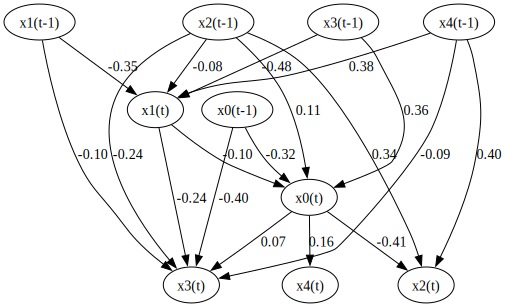

In [88]:
labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x4(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)', 'x4(t-1)']
#labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)']
# labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x4(t)', 'x5(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)', 'x4(t-1)', 'x5(t-1)']
dot = make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)


# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

## Independence between error variables
To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables $e_i$ and $e_j$.

In [65]:
p_values = model.get_error_independence_p_values()
print(p_values)

[[0.    0.127 0.104 0.042 0.746]
 [0.127 0.    0.086 0.874 0.739]
 [0.104 0.086 0.    0.404 0.136]
 [0.042 0.874 0.404 0.    0.763]
 [0.746 0.739 0.136 0.763 0.   ]]


## Bootstrap

### Bootstrapping
We call `bootstrap()` method instead of `fit()`. Here, the second argument specifies the number of bootstrap sampling.

In [11]:
model = lingam.VARLiNGAM()
result = model.bootstrap(X, n_sampling=100)

## Causal Directions
Since `BootstrapResult` object is returned, we can get the ranking of the causal directions extracted by `get_causal_direction_counts()` method. In the following sample code, `n_directions` option is limited to the causal directions of the top 8 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.3 or more.

In [12]:
cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.3, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [13]:
print_causal_directions(cdc, 100, labels=labels)

x2(t) <--- x4(t-1) (b>0) (100.0%)
x2(t) <--- x2(t-1) (b>0) (100.0%)
x0(t) <--- x0(t-1) (b<0) (95.0%)
x1(t) <--- x1(t-1) (b<0) (86.0%)
x1(t) <--- x4(t-1) (b>0) (85.0%)
x3(t) <--- x0(t-1) (b<0) (78.0%)
x2(t) <--- x4(t) (b<0) (60.0%)
x0(t) <--- x3(t-1) (b>0) (48.0%)


## Directed Acyclic Graphs
Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.2 or more.

In [14]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.2, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [62]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 6.0%
	x0(t) <--- x2(t-1) (b<0)
	x1(t) <--- x3(t-1) (b>0)
	x2(t) <--- x1(t-1) (b<0)
	x3(t) <--- x2(t-1) (b>0)
	x3(t) <--- x4(t-1) (b>0)
	x4(t) <--- x1(t) (b<0)
	x4(t) <--- x3(t) (b>0)
	x4(t) <--- x0(t-1) (b<0)
	x4(t) <--- x1(t-1) (b<0)
	x4(t) <--- x2(t-1) (b<0)
DAG[1]: 6.0%
	x0(t) <--- x2(t-1) (b<0)
	x1(t) <--- x3(t-1) (b>0)
	x2(t) <--- x1(t-1) (b<0)
	x3(t) <--- x2(t-1) (b>0)
	x4(t) <--- x1(t) (b<0)
	x4(t) <--- x3(t) (b>0)
	x4(t) <--- x0(t-1) (b<0)
	x4(t) <--- x1(t-1) (b<0)
	x4(t) <--- x2(t-1) (b<0)
DAG[2]: 4.0%
	x0(t) <--- x1(t) (b<0)
	x0(t) <--- x2(t-1) (b<0)
	x1(t) <--- x3(t-1) (b>0)
	x2(t) <--- x3(t) (b>0)
	x2(t) <--- x1(t-1) (b<0)
	x3(t) <--- x2(t-1) (b>0)
	x4(t) <--- x1(t) (b<0)
	x4(t) <--- x3(t) (b>0)
	x4(t) <--- x0(t-1) (b<0)
	x4(t) <--- x1(t-1) (b<0)
	x4(t) <--- x2(t-1) (b<0)


## Probability
Using the `get_probabilities()` method, we can get the probability of bootstrapping.

In [63]:
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of B0:\n', prob[0])
print('Probability of B1:\n', prob[1])

Probability of B0:
 [[0.   0.23 0.05 0.02 0.02]
 [0.65 0.   0.09 0.13 0.06]
 [0.   0.18 0.   0.36 0.13]
 [0.41 0.16 0.48 0.   0.12]
 [0.07 0.94 0.39 0.88 0.  ]]
Probability of B1:
 [[0.03 0.81 1.   0.5  0.02]
 [0.06 0.06 0.11 0.9  0.02]
 [0.   1.   0.07 0.03 0.65]
 [0.1  1.   1.   0.18 0.86]
 [1.   0.99 1.   0.06 0.04]]


## Total Causal Effects
Using the `get_causal_effects()` method, we can get the list of total causal effect. The total causal effects we can get are dictionary type variable.
We can display the list nicely by assigning it to pandas.DataFrame. Also, we have replaced the variable index with a label below.

In [44]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)

df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,x0(t-1),x4(t),-63.186017,1.00
1,x3(t-1),x2(t),-6.767336,1.00
2,x4(t-1),x2(t),1.270818,1.00
3,x4(t-1),x5(t),3.151725,1.00
4,x0(t-1),x3(t),-2.275083,1.00
...,...,...,...,...
61,x0(t),x2(t),2.027842,0.31
62,x5(t),x3(t),0.066527,0.28
63,x0(t),x3(t),0.272175,0.27
64,x1(t),x4(t),2.237439,0.27


We can easily perform sorting operations with pandas.DataFrame.

In [45]:
df.sort_values('effect', ascending=False).head()

,from,to,effect,probability
48,x3(t),x1(t),14.836681,0.53
58,x0(t),x4(t),6.267577,0.34
8,x1(t-1),x1(t),6.195928,1.00
24,x1(t-1),x4(t),6.088007,1.00
44,x3(t),x2(t),6.077103,0.57


And with pandas.DataFrame, we can easily filter by keywords. The following code extracts the causal direction towards x1(t).

In [46]:
df[df['to']=='x1(t)'].head()

,from,to,effect,probability
5,x4(t-1),x1(t),4.815899,1.00
6,x3(t-1),x1(t),-27.044629,1.00
8,x1(t-1),x1(t),6.195928,1.00
9,x0(t-1),x1(t),-63.035856,1.00
25,x5(t-1),x1(t),2.601362,0.99


Because it holds the raw data of the total causal effect (the original data for calculating the median), it is possible to draw a histogram of the values of the causal effect, as shown below.

(array([ 5., 13.,  9.,  8., 12., 15., 23., 10.,  2.,  3.]),
 array([1.089, 1.186, 1.282, 1.378, 1.475, 1.571, 1.668, 1.764, 1.86 ,
        1.957, 2.053]),
 <BarContainer object of 10 artists>)

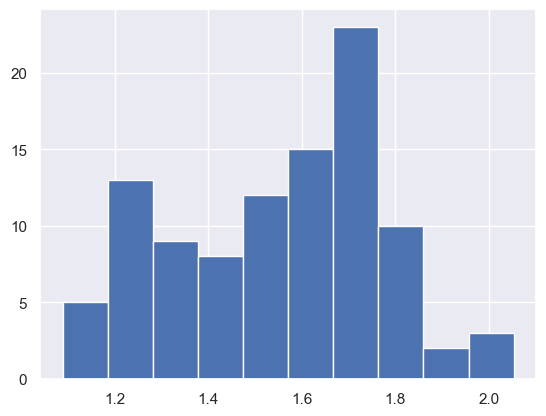

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from_index = 7 # index of x2(t-1). (index:2)+(n_features:5)*(lag:1) = 7
to_index = 2 # index of x2(t). (index:2)+(n_features:5)*(lag:0) = 2
plt.hist(result.total_effects_[:, to_index, from_index])